
# Trabajo Práctico 2


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripción completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.



# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [2]:
import pandas as pd

# Cargar datos
Cargar los datos de entrenamiento.

In [3]:
train = pd.read_csv("data/Features_Variant_5.csv", header=None)
test = pd.read_csv("data/Test_Case_5.csv", header=None)

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario. 

**NOTA PABLO GAMEZ**: El objetivo de esta etapa es ver si podemos reducir el número de features de acuerdo a una serie de criterios.

In [5]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,...,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000,199030.000000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,0.470256,485.317656,55.901120,35.263538,68.090731,0.068135,...,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236,7.168708
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,13.178067,538.194418,86.515496,68.162671,82.411057,2.172591,...,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942,34.298193
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.494737,2.000000,8.033255,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,784.000000,70.931961,41.000000,104.152684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1458.000000,2495.000000,2031.000000,2123.000000,762.357746,227.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1702.000000


<AxesSubplot:>

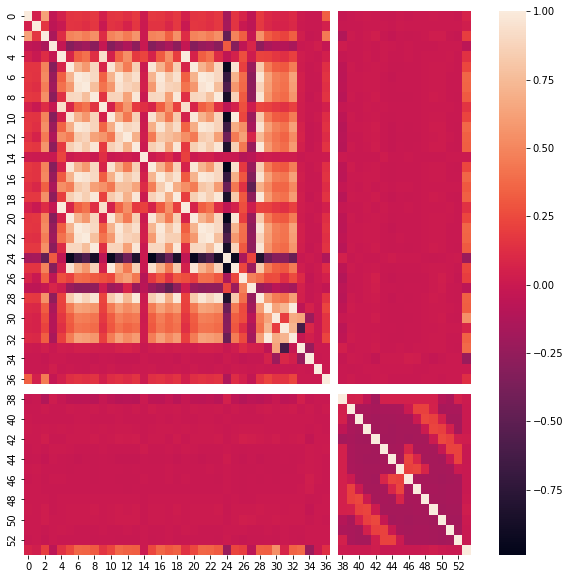

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

train_corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_corr_matrix)

Dos observaciones:

- Vemos que la columna 37 exhibe un valor de correlación distinta a las demás y que es muy claro, lo que indica que está cercano a 1. Analizaremos esta columna ya que aparenta tener nulos

- Asimismo eliminaremos columnas cuya correlación con respecto a la columna de la variable target sea > 0.8 a efectos de reducir el número de features


In [7]:
if(train[37]==0).all():
    print("La columna 37 tiene todos sus valores nulos")


La columna 37 tiene todos sus valores nulos


Por lo tanto, descartamos la columna en cuestión

In [8]:
train_trim = train.drop(37, axis=1)

Analicemos ahora las correlaciones con respecto a la columna 53, para observar valores de correlación mayores a 0.8

In [9]:
abs(train_trim.corr()[53])

0     0.064537
1     0.035152
2     0.194768
3     0.069001
4     0.138996
5     0.238743
6     0.359536
7     0.349452
8     0.316593
9     0.153853
10    0.229139
11    0.368003
12    0.339229
13    0.329067
14    0.004411
15    0.234408
16    0.356985
17    0.303185
18    0.333375
19    0.139476
20    0.232497
21    0.356769
22    0.348033
23    0.309988
24    0.221228
25    0.230101
26    0.192558
27    0.065052
28    0.339319
29    0.327086
30    0.545260
31    0.073260
32    0.342653
33    0.375318
34    0.224366
35    0.001237
36    0.124638
38    0.012255
39    0.000587
40    0.000575
41    0.004769
42    0.022337
43    0.009496
44    0.010470
45    0.008114
46    0.008700
47    0.003049
48    0.004611
49    0.023267
50    0.000927
51    0.007210
52    0.008304
53    1.000000
Name: 53, dtype: float64

Vemos que en todos los casos la correlación con respecto a la columna 53 está muy por debajo de 0.8.
Por lo tanto, no eliminaremos ninguna columna. Este dataset parece estar bastante procesado y limpio.
Veamos cómo queda el heatmap con la columna 37 eliminada.

<AxesSubplot:>

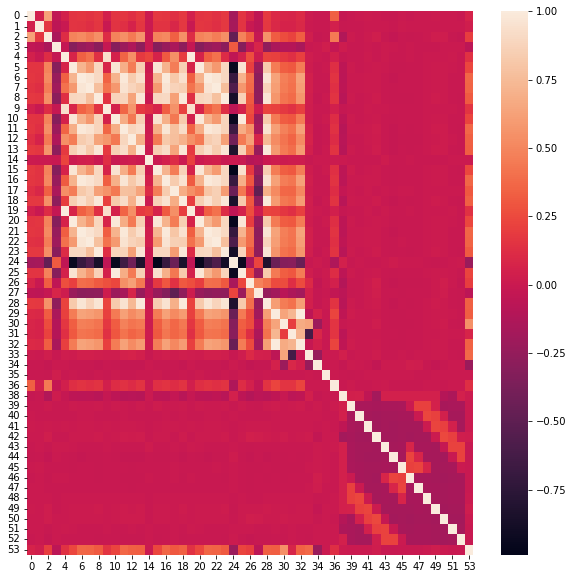

In [10]:
train_trim_corr_matrix = train_trim.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_trim_corr_matrix)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [11]:
# Armo las matrices X_train, X_test, y los vectores Y_train, Y_test

X_train = train_trim.drop(53, axis=1)
Y_train = train_trim[53]

# Recordemos que habíamos dropeado la columna 37 del dataset de train.
# Hacemos lo mismo para el dataset de test, recordando también
# de eliminar la columna 53

X_test = test.drop(columns=[37,53], axis=1)
Y_test = test[53]


In [12]:
# Verificamos que las shapes sean consistentes
print(X_test.shape)
print(Y_test.shape)

(100, 52)
(100,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [15]:
print("MSE: {}".format(mean_squared_error(Y_pred, Y_test)))
print("Ordenada: {}".format(model.intercept_))
print("Variance Score (mejor=1) {:.2f}".format(r2_score(Y_test, Y_pred)))

MSE: 1860.394081416852
Ordenada: -5.113862237236396
Variance Score (mejor=1) 0.51


Vemos que el score de varianza está lejos de 1, este valor nos da una idea de que la estimación no ha sido muy buena. Haremos una comparación de valores de test vs valores predichos. 

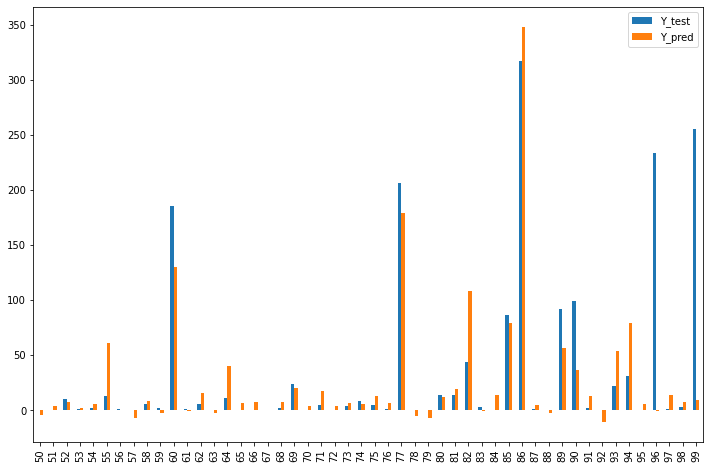

In [40]:
df_dict = {'Y_test': Y_test[0:100],
            'Y_pred': Y_pred[0:100]}
df = pd.DataFrame(df_dict, columns=['Y_test','Y_pred'])
df_tail = df.tail(50)
df_tail.plot(kind='bar',figsize=(12,8))
plt.show()

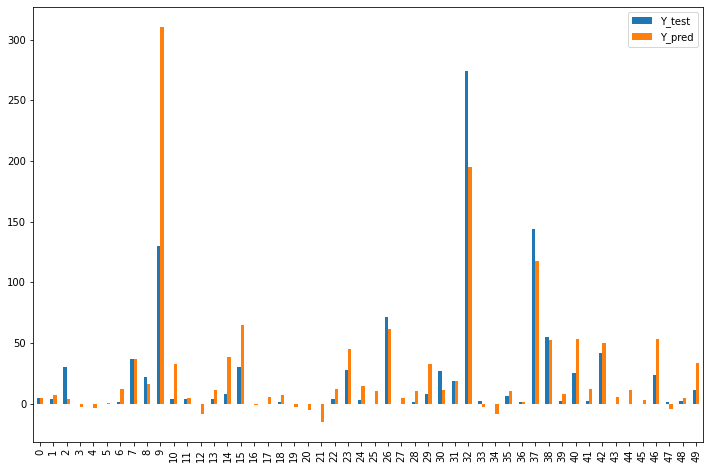

In [38]:
# Ahora mostramos los primeros 50

df_head = df.head(50)
df_head.plot(kind='bar',figsize=(12,8))
plt.show()

Conclusión: vemos que la estimación no es del todo buena. Restan probar diferentes alternativas que permitan mejorar esta estimación.